# League of legends 10 first min

League of legends is a game developped by Riot games where two teams of five players fight to break the ennemies nexus. The teams are composed of a red and blue team decided by there starting point in the map.

# Exploratory Data Analysis

## Goal

- Predict which team will win the game

## Base checklist

### Form analysis

- **Target var** : blueWins
- **Raws and lines** : 9879x40
- **Analysis of nan var** : No nan var in the dataset
- **Analysis of object var** : No object var in the dataset

### In-depth analysis

#### Target visualisation

- We have 50/50 wins for each team, the dataset seels to be well dispatched

#### Var meaning

- The data from both teams seems really similar between the red and blue team

#### Relation Target / Vars

- Apart from the hearld, ward related and minions related every vars seems important

## Detailed analysis

#### Relation var/var

- Relation between gold per minute is related to kills/death/assits
- Relation between total minions and minions killed per minutes (obviously)
- Relation between gold and exp seems high
- Relation between the ward and monster and the other variable doesn't seems high

## Hypothesis

- The vars like kills and deaths, or levels and xp, or total minions and cs per minute seems too similar, maybe the model would work better without them
- We can supress the vars related to monsters, wards and towers

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [4]:
data = pd.read_csv('high_diamond_ranked_10min.csv')
df = data.copy()

## Form analysis

In [5]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [6]:
df.shape

(9879, 40)

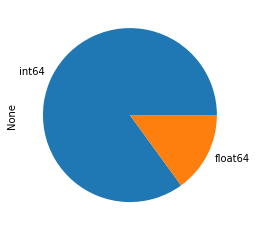

In [7]:
df.dtypes.value_counts().plot.pie()

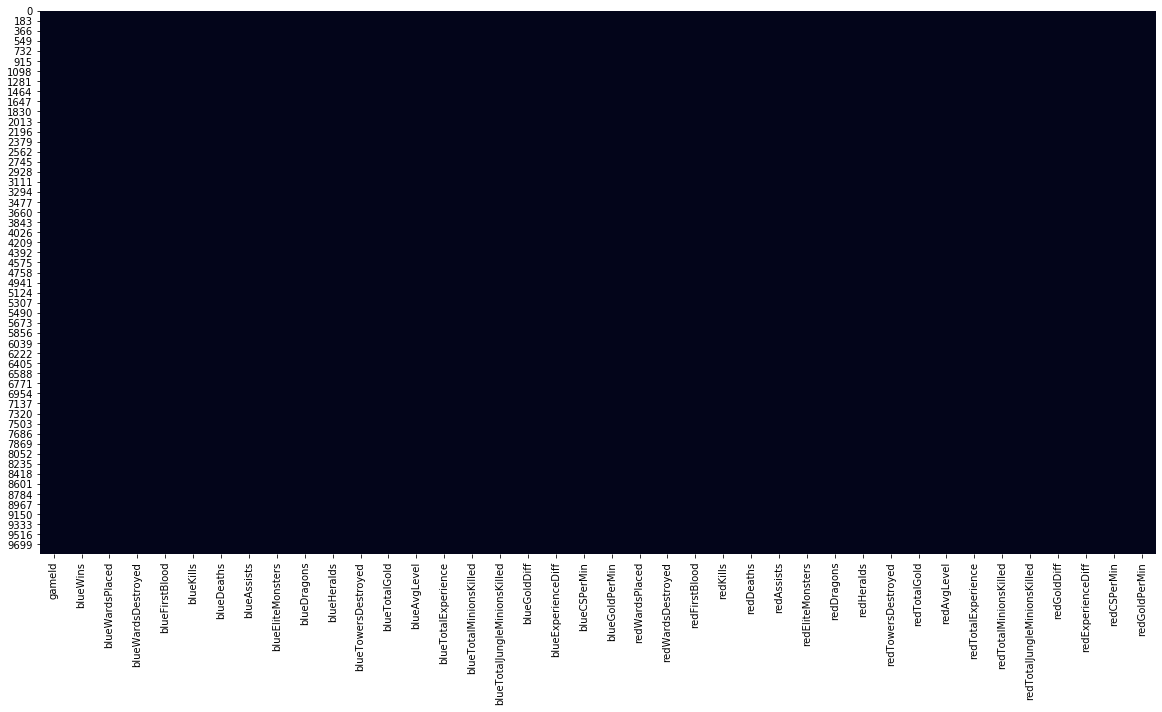

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [9]:
(df.isna().sum()/df.shape[0]).value_counts()

0.0    40
dtype: int64

## Deep analysis

### Delete obvious useless columns

In [10]:
# No need of the gameId
# Red kills and death are blue kills and death but reversed
# Elite monsters are only the additions of dragons and herald
df = df.drop(['gameId', 'blueEliteMonsters', 'redKills', 'redDeaths', 'redEliteMonsters'], axis=1)
df.shape

(9879, 35)

### Check of the goal var

In [11]:
df["blueWins"].value_counts(normalize = True)

0    0.500962
1    0.499038
Name: blueWins, dtype: float64

### Histogram of var

In [12]:
df.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.662112,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,4.060612,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,9.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,28.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


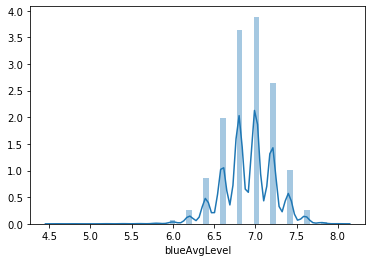

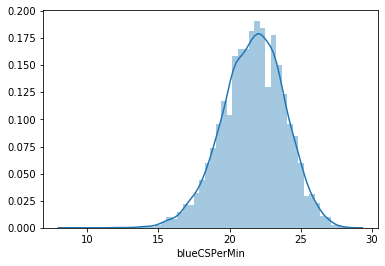

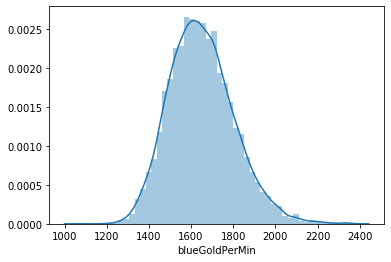

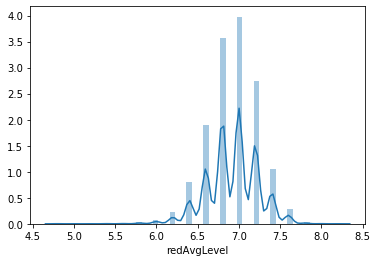

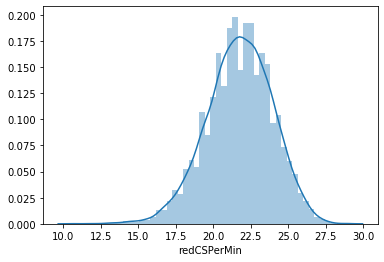

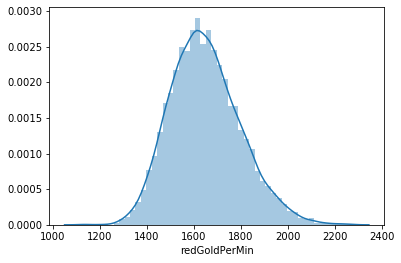

In [13]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

### Realtion taget/variable

In [14]:
redWin_df = df[df['blueWins'] == 0]
blueWin_df = df[df['blueWins'] == 1]
red_columns = df.loc[:, 'redWardsPlaced':'redGoldPerMin'].columns
blue_columns = df.loc[:, 'blueWardsPlaced': 'blueGoldPerMin'].columns

C:\Users\1650834\AppData\Local\Continuum\anaconda3\envs\option2\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\1650834\AppData\Local\Continuum\anaconda3\envs\option2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


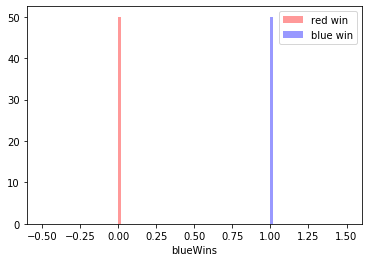

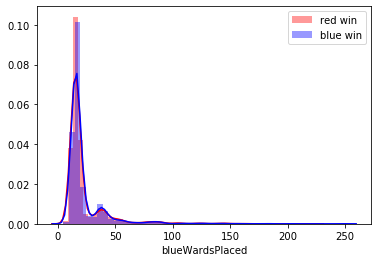

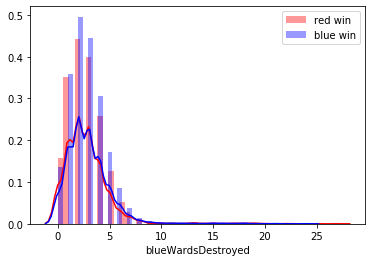

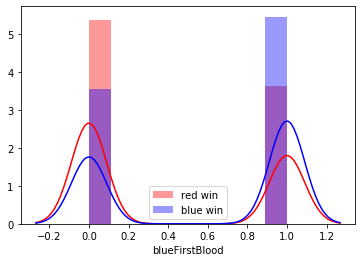

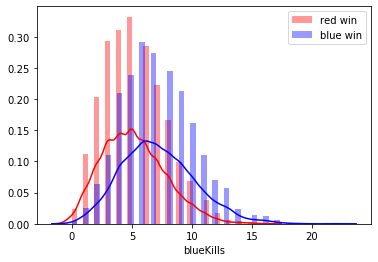

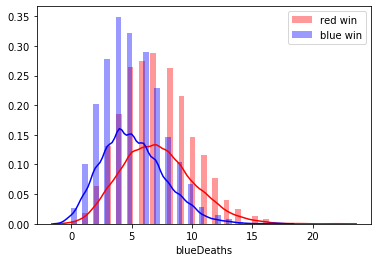

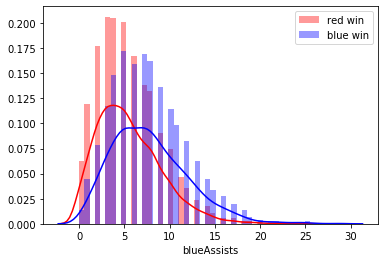

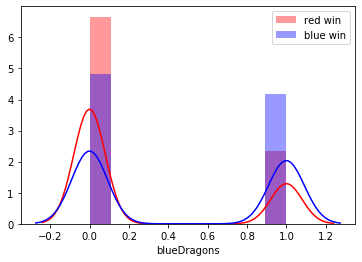

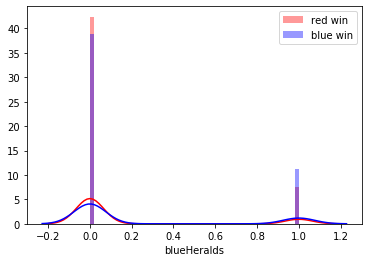

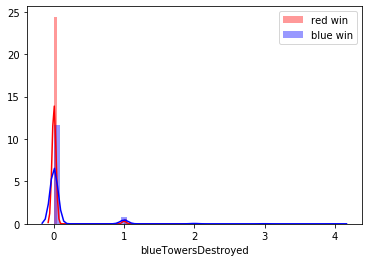

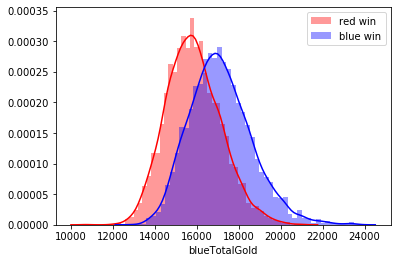

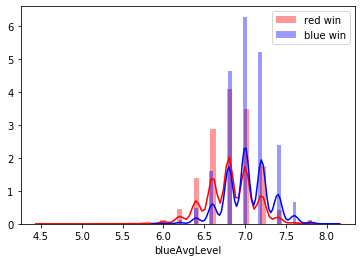

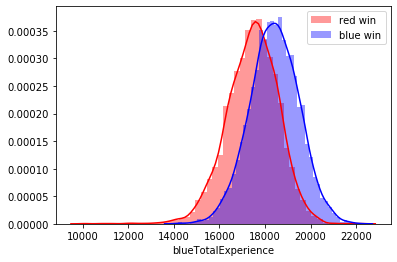

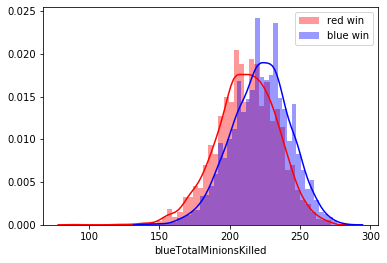

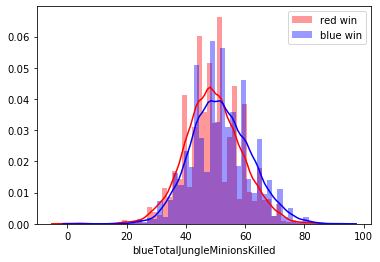

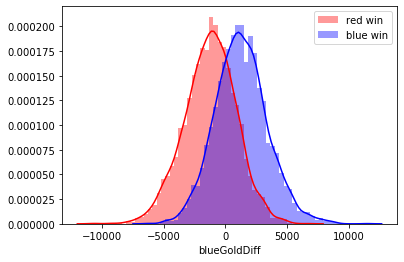

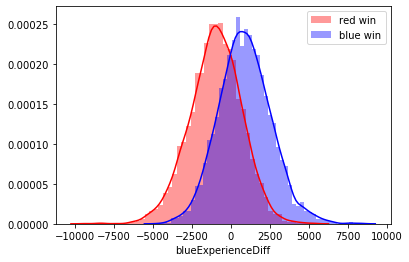

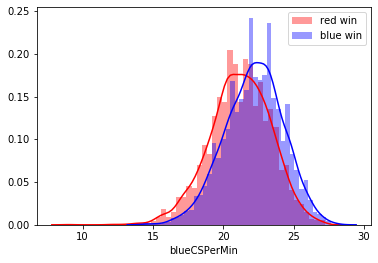

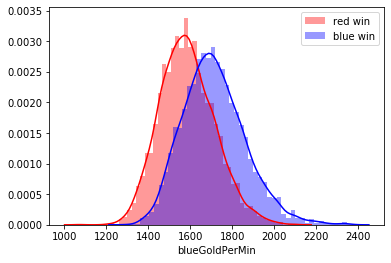

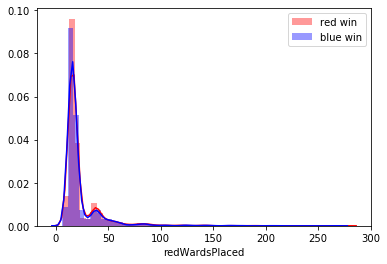

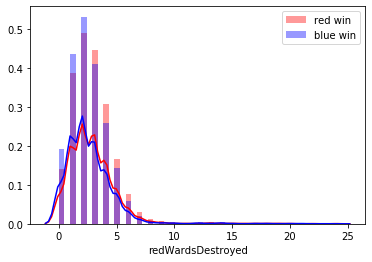

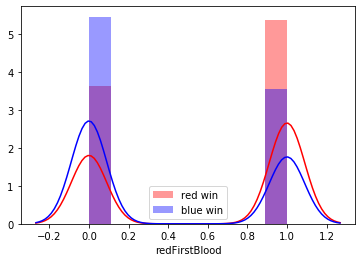

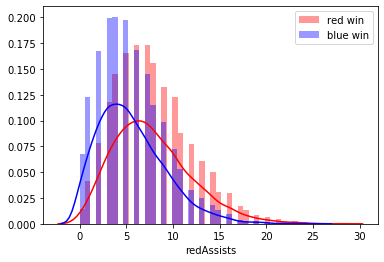

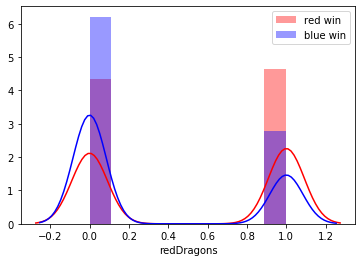

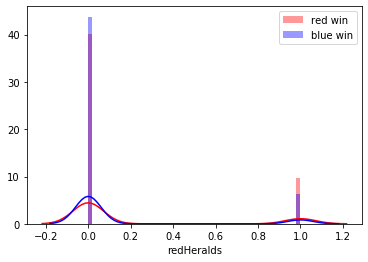

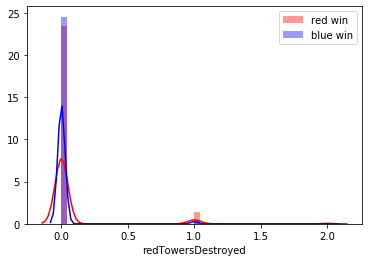

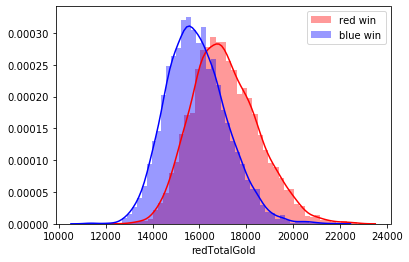

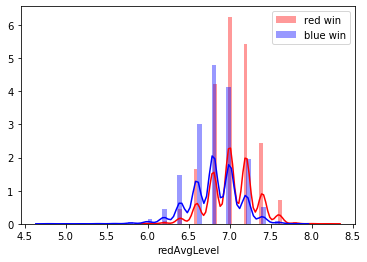

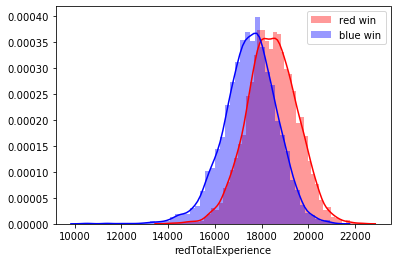

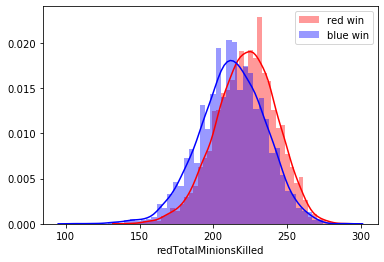

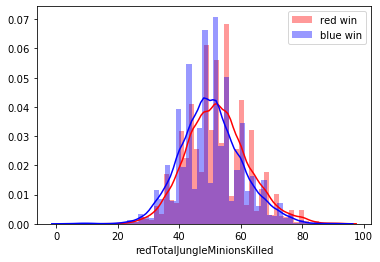

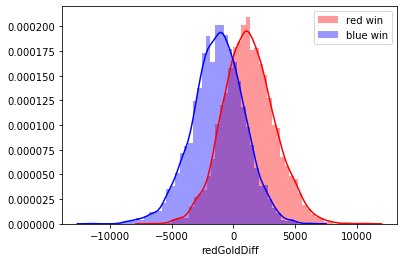

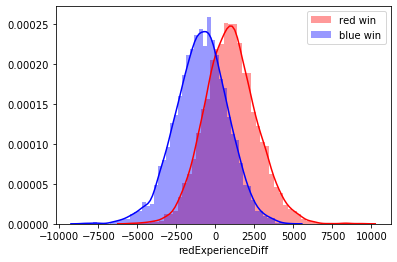

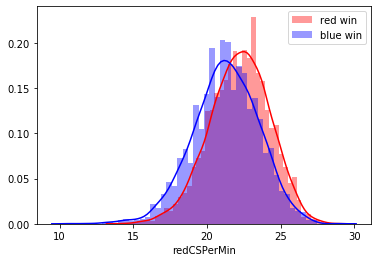

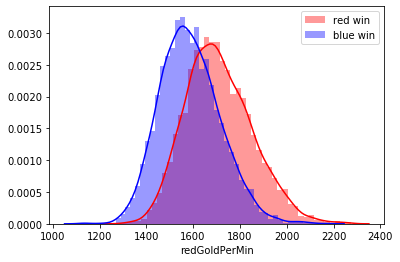

In [15]:
for col in df:
    plt.figure()
    sns.distplot(redWin_df[col], label='red win', color='red')
    sns.distplot(blueWin_df[col], label='blue win', color='blue')
    plt.legend()

## Deatailled analysis

### Relation var/var

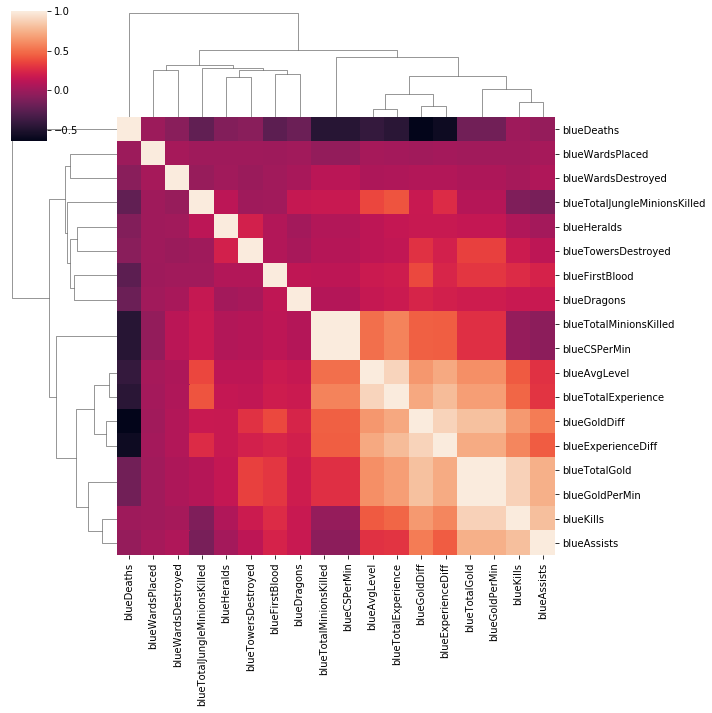

In [16]:
sns.clustermap(df[blue_columns].corr())

In [17]:
# We can see that the Herarld, jungle monsters, the towers and the wards related columns disapeared

corr_list = df[df.columns[1:]].apply(lambda x: x.corr(df['blueWins']))
cols = []
for col in corr_list.index:
    if (corr_list[col]>0.2 or corr_list[col]<-0.2):
        cols.append(col)
cols

['blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueDragons',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin',
 'redFirstBlood',
 'redAssists',
 'redDragons',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redGoldDiff',
 'redExperienceDiff',
 'redCSPerMin',
 'redGoldPerMin']

# Preprocessing

In [18]:
df = data.copy()

In [19]:
df = df.drop('gameId', axis=1)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [22]:
trainset['blueWins'].value_counts()

1    3953
0    3950
Name: blueWins, dtype: int64

In [23]:
testset['blueWins'].value_counts()

0    999
1    977
Name: blueWins, dtype: int64

## Encoding, Feature engineering, imputing

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [25]:
def encoding(df):
    # No need for this dataset, no data with 'object' type
    return df

In [26]:
def feature_engineering(df, columns):
    return df.drop(columns, axis=1)

In [27]:
def imputation(df):
    # No need for this dataset, no 'nan' data
    return df

In [28]:
def preprocessing(df, hypothesis):
    df = encoding(df)
    df = feature_engineering(df, hypothesis)
    df = imputation(df)
    
    X = df.drop('blueWins', axis=1)
    y = df['blueWins']
    
    # Standardisation to keep X as a DataFrame
    scaled_features = StandardScaler().fit_transform(X)
    X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
    
    # One Hot Encoder
    # y = OneHotEncoder(sparse=False).fit_transform(np.array(y).reshape(-1, 1))
    
    return X,y

## Evaluation

In [29]:
def evaluation(model, hypothesis=[], displayGraph=False, displayBar=False):
    X_train, y_train = preprocessing(trainset, hypothesis)
    X_test, y_test = preprocessing(testset, hypothesis)
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
        
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    if displayGraph:
        N, train_score, val_score = learning_curve(model, X_train, y_train,
                                                cv=4, scoring='f1',
                                                train_sizes=np.linspace(0.1, 1, 10))
    
        plt.figure(figsize=(12, 8))
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()
    
    if displayBar:
        pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

## Test hypothesis on estimator

In [30]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [31]:
estimator = RandomForestClassifier(random_state=0)

In [32]:
hypothesis = [
    [],
    ['blueTotalExperience', 'blueCSPerMin', 'redDeaths', 'redKills', 'redTotalExperience', 'redCSPerMin'],
    ['blueWardsPlaced', 'blueWardsDestroyed', 'blueEliteMonsters', 'blueDragons', 'blueHeralds',
        'blueTowersDestroyed',
        'redWardsPlaced', 'redWardsDestroyed', 'redEliteMonsters', 'redDragons', 'redHeralds',
        'redTowersDestroyed'
    ],
    ['blueWardsPlaced', 'blueWardsDestroyed', 'blueEliteMonsters', 'blueDragons', 'blueHeralds',
        'blueTowersDestroyed', 'blueDeaths', 'blueTotalExperience', 'blueCSPerMin',
        'redWardsPlaced', 'redWardsDestroyed', 'redEliteMonsters', 'redDragons', 'redHeralds',
        'redTowersDestroyed', 'redDeaths', 'redTotalExperience', 'redCSPerMin']
]

[[727 272]
 [293 684]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       999
           1       0.72      0.70      0.71       977

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976

[[739 260]
 [297 680]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       999
           1       0.72      0.70      0.71       977

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

[[706 293]
 [303 674]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       999
           1       0.70      0.69      0.69       977

    accuracy                           0.70      1976
   macro avg       0.70      0.70      0.70      1976
weigh

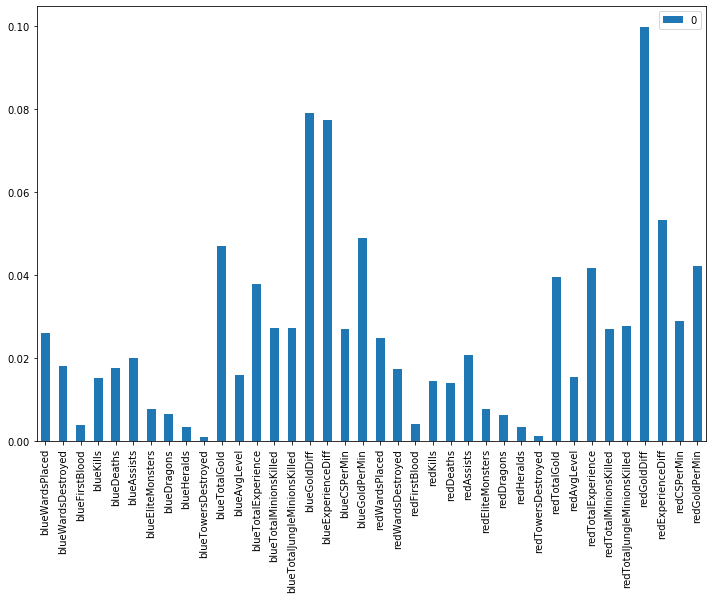

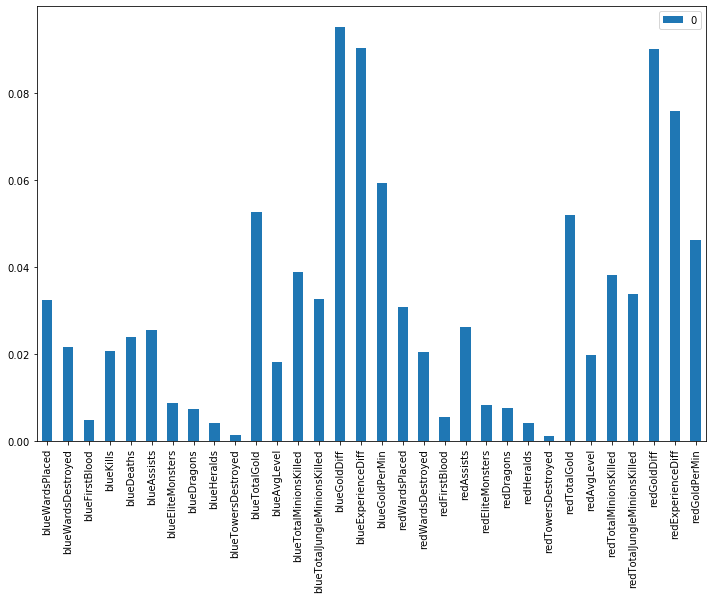

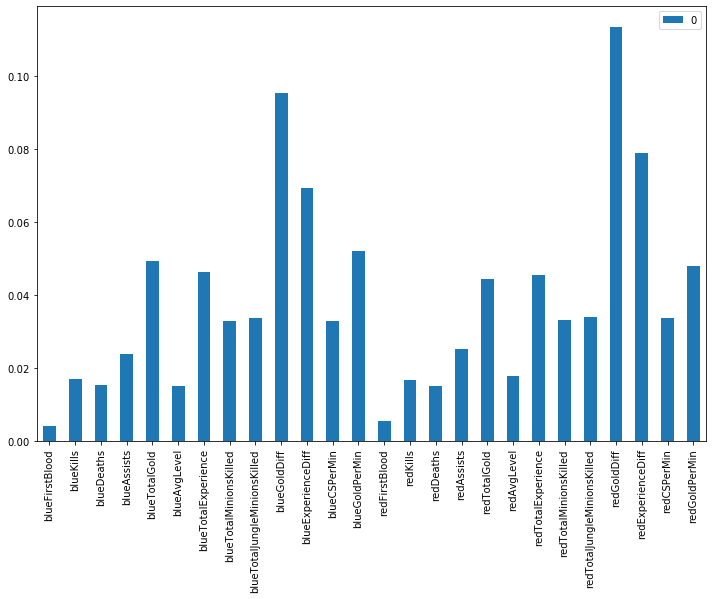

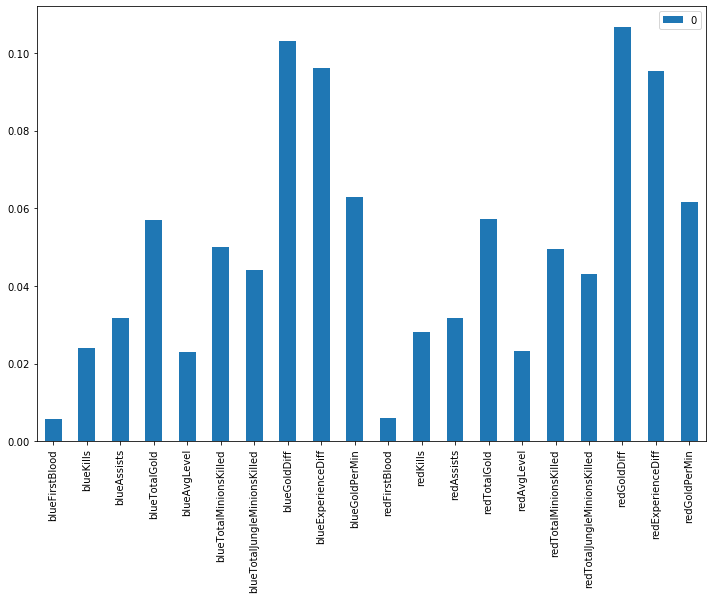

In [33]:
for hypo in hypothesis:
    evaluation(estimator, hypothesis=hypo, displayBar=True)

We will chose hypothesis 1, but let's drop the values with low correlation

In [34]:
hypothesis.append(['blueTotalExperience', 'blueCSPerMin', 'redDeaths', 'redKills', 'redTotalExperience', 'redCSPerMin',
                   'blueFirstBlood', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed',
                   'redFirstBlood', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed'])

In [35]:
evaluation(estimator, hypothesis=hypothesis[-1])

[[719 280]
 [294 683]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       999
           1       0.71      0.70      0.70       977

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976



It doesn't seems to make it better

In [36]:
hypothesis_choice = 1

## Test preprocessors

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [38]:
preprocessors = {
    'PCA' : PCA(n_components=3),
    'PolynomialFeature': PolynomialFeatures(3),
    'SelectKBest 14': SelectKBest(f_classif, k=14),
    'SelectKBest 6': SelectKBest(f_classif, k=6),
    'PF + SKB': make_pipeline(PolynomialFeatures(3), SelectKBest(f_classif, k=6))
}

In [39]:
for name, preprocessor in preprocessors.items():
    print(name)
    evaluation(make_pipeline(preprocessor, estimator), hypothesis[hypothesis_choice])

PCA
[[699 300]
 [300 677]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       999
           1       0.69      0.69      0.69       977

    accuracy                           0.70      1976
   macro avg       0.70      0.70      0.70      1976
weighted avg       0.70      0.70      0.70      1976

PolynomialFeature
[[732 267]
 [303 674]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       999
           1       0.72      0.69      0.70       977

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976

SelectKBest 14
[[696 303]
 [308 669]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       999
           1       0.69      0.68      0.69       977

    accuracy                           0.69      1976
   macro avg       0.6

C:\Users\1650834\AppData\Local\Continuum\anaconda3\envs\option2\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\1650834\AppData\Local\Continuum\anaconda3\envs\option2\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[700 299]
 [331 646]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       999
           1       0.68      0.66      0.67       977

    accuracy                           0.68      1976
   macro avg       0.68      0.68      0.68      1976
weighted avg       0.68      0.68      0.68      1976



It doesn't seems to give good result

# Modelisation

In [40]:
df = data.copy()

In [41]:
df = df.drop('gameId', axis=1)

## Train Test

In [42]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

## Estimator decision

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [44]:
estimators = {
    'RandomForest': RandomForestClassifier(random_state=0),
    'GradientBoosting': GradientBoostingClassifier(random_state=0),
    'SVC' : SVC(random_state=0),
    'KNeighbors': KNeighborsClassifier()
}

RandomForest
[[739 260]
 [297 680]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       999
           1       0.72      0.70      0.71       977

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

GradientBoosting
[[735 264]
 [289 688]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       999
           1       0.72      0.70      0.71       977

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

SVC
[[730 269]
 [288 689]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       999
           1       0.72      0.71      0.71       977

    accuracy                           0.72      1976
   macro avg       0.72  

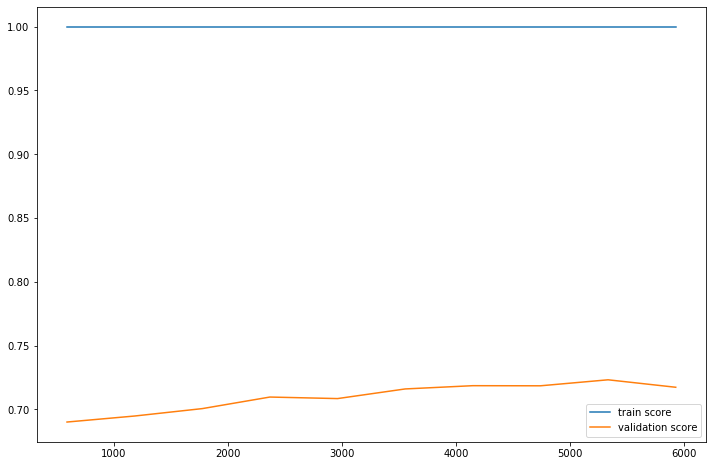

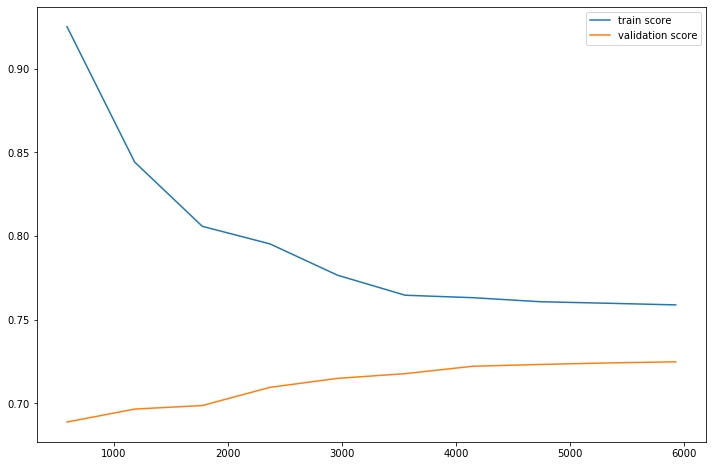

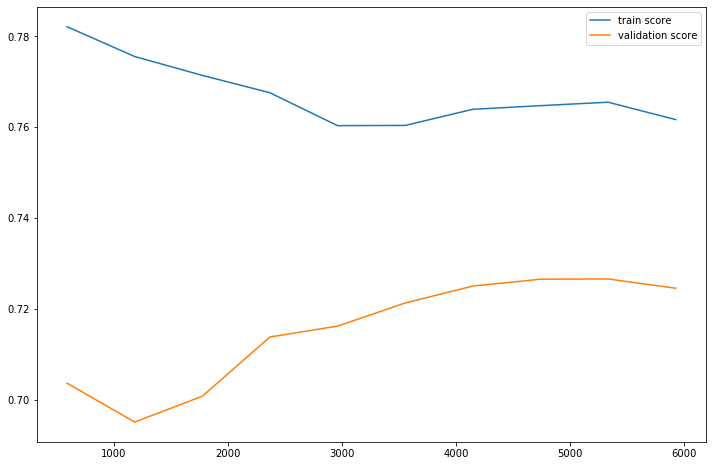

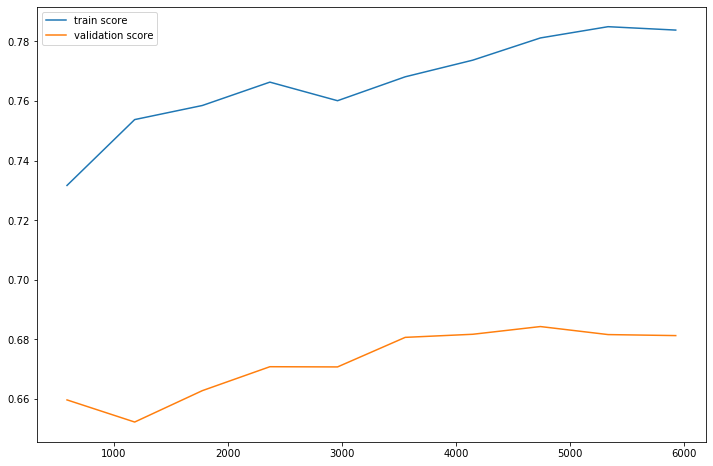

In [45]:
for name_e, estimator in estimators.items():
    print(name_e)
    model = estimator
    evaluation(model, hypothesis=hypothesis[hypothesis_choice], displayGraph=True)

Gradient Boosting seems promising, let's optimise it

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [47]:
X_train, y_train = preprocessing(trainset, hypothesis=hypothesis[hypothesis_choice])
X_test, y_test = preprocessing(testset, hypothesis=hypothesis[hypothesis_choice])

In [48]:
model = GradientBoostingClassifier(random_state=0)
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
hyper_params = {
    'learning_rate': [0.5, 0.1, 0.05, 0.01],
    'n_estimators': [16, 32, 64, 100, 200],
    'max_depth': np.linspace(2, 32, 7, endpoint=True),
    'min_samples_split': np.linspace(0.1, 1.0, 5, endpoint=True),
    'max_features': np.linspace(0.1, 1.0, 5, endpoint=True)
}

In [51]:
randSearch = RandomizedSearchCV(model, hyper_params, scoring='f1', cv=4,
                          n_iter=100)

randSearch.fit(X_train, y_train)

print(randSearch.best_params_)

y_pred = randSearch.predict(X_test)

print(classification_report(y_test, y_pred))

{'n_estimators': 100, 'min_samples_split': 0.775, 'max_features': 0.775, 'max_depth': 12.0, 'learning_rate': 0.05}
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       999
           1       0.72      0.70      0.71       977

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

